## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

**Note:** I will not be providing support for people trying to run this notebook outside of the Anaconda Python distribution.

# Step 1 - Defining the Problem

Continuing with the Iris dataset, suppose that we have Iris already identified in the 3 classes but
now we have also the Iris packed in different types of packages: “Simple – 0”, “Gift – 1” and “Luxury
– 3”. We also have a new variable “price” with three possibilities: “Low”, “Medium”, “High”

We have now a different classification problem in which we want to predict the “price” classification
based on the remaining characteristics: sepal_length_cm, sepal_width_cm, petal_length_cm,
petal_width_cm, iris_type, and package.

## Step 1.1 - Importing the Libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sb
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

iris_data = pd.read_csv('iris-data-new2.csv', na_values=['NA'])
iris_data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,iris_type,package,price
0,5.1,3.5,1.4,0.2,Iris-setosa,2,Medium
1,4.9,3.0,1.4,0.2,Iris-setosa,1,Low
2,4.7,3.2,1.3,0.2,Iris-setosa,0,Low
3,4.6,3.1,1.5,0.2,Iris-setosa,0,Low
4,5.0,3.6,1.4,0.2,Iris-setosa,0,Low


In [11]:
iris_data.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,package
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.847651,3.059732,3.775168,1.209732,0.442953
std,0.799542,0.430104,1.758720,0.762191,0.710753
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Step 1.2 - Visualizing the Data

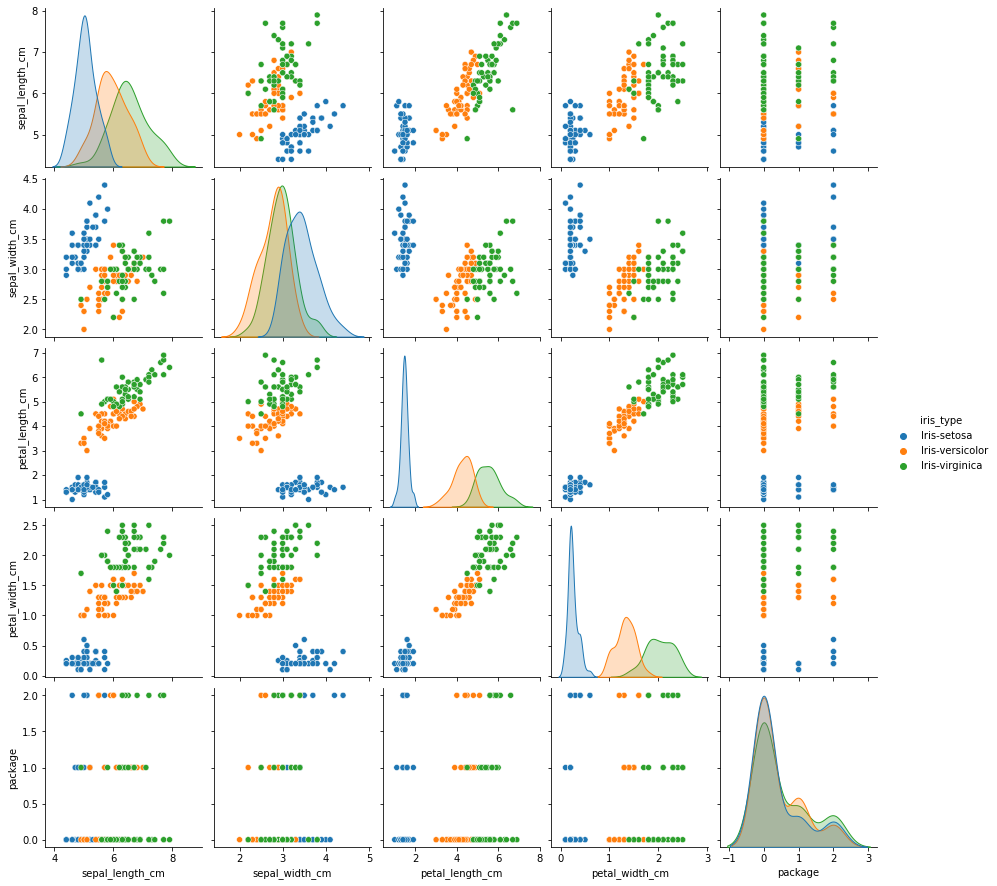

In [15]:
sb.pairplot(iris_data.dropna(), hue='iris_type')


# Step 2 - Creating a Model

Using only the attribute sepal_length_cm, sepal_width_cm, petal_length_cm,
petal_width_cm, fit a simple decision tree model to the data

First we need to extract the data from the file

In [22]:
iris_data = pd.read_csv('iris-data-new2.csv')

# We're using all four measurements as inputs
# Note that scikit-learn expects each entry to be a list of values, e.g.,
# [ [val1, val2, val3],
#   [val1, val2, val3],
#   ... ]
# such that our input data set is represented as a list of lists

# We can extract the data in this format from pandas like this:
all_inputs = iris_data[['sepal_length_cm', 'sepal_width_cm',
                             'petal_length_cm', 'petal_width_cm']].values

# Similarly, we can extract the class labels
all_labels = iris_data['iris_type'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [23]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.9736842105263158